# Import Packages and Dataset

In [56]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
import pandas as pd
import numpy as np

In [57]:
dt = pd.read_csv('VeggiePriceOAC.csv')
dt.head()

,Center,Item,Min Price,Max Price,Total Arrival,Year,Month,Min Temp,Max Temp,Wind Speed( ),RainFall( ),Humidity( ),Cloud( ),Pressure( ),Yield
0,Chennai,Onion,1902,3089,12860,2010,1,24,27,19,0.7,75,24,1012,0
1,Chennai,Onion,1589,2409,11570,2010,2,28,24,9,0.0,73,1,1015,1
2,Chennai,Onion,1122,1968,12680,2010,3,25,31,12,0.0,70,0,1013,1
3,Chennai,Onion,820,1387,11780,2010,4,30,36,21,0.0,70,6,1008,1
4,Chennai,Onion,833,1463,12320,2010,5,33,29,12,3.6,73,38,1010,1


In [58]:
#Data cleaning
dt.iloc[:,:-1]= dt.iloc[:,:-1].replace(0, np.nan)
dt.iloc[:,:-2]= dt.iloc[:,:-2].fillna(dt.iloc[:,:-2].groupby('Center').transform('mean'))
#dt.iloc[:,2:]= dt.iloc[:,2:].replace(0,dt.iloc[:,2:].mean())

# Given Climatic Conditions

In [59]:
#split into input and output sets
X = dt.drop(columns=["Item", "Total Arrival", "Yield", "Year", "Min Price", "Max Price"])
Y = dt["Yield"]

In [60]:
#one-hot encoding 'Center'
X_new = pd.get_dummies(X, columns=['Center'])

In [61]:
#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new,Y,test_size=0.1, random_state=100)

# Given Market Price 

In [78]:
#split into input and output sets
X1 = dt.drop(columns=["Item", "Yield", "Total Arrival", "Year", "Min Temp", "Max Temp", "Wind Speed( )", "Humidity( )", "Cloud( )", "RainFall(   )", "Pressure(  )"])
Y1 = dt["Yield"]

In [79]:
#one-hot encoding 'Center'
X1_new = pd.get_dummies(X1, columns=['Center'])

In [86]:
#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1_new,Y1,test_size=0.1, random_state=100)

In [26]:
y_test.size

86

# Given Availability of Crop

In [91]:
#split into input and output sets
X2 = dt.drop(columns=["Item", "Yield", "Year", "Min Temp", "Max Temp", "Wind Speed( )", "Humidity( )", "Cloud( )", "RainFall(   )", "Pressure(  )", "Min Price", "Max Price"])
Y2 = dt["Yield"]

In [92]:
#one-hot encoding 'Center'
X2_new = pd.get_dummies(X2, columns=['Center'])

In [103]:
#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X2_new,Y1,test_size=0.3, random_state=90)

# Running & Evaluating SVM Model 

In [104]:
#Run the svm model
cls = svm.SVC(kernel="linear")
cls.fit(X_train, y_train)

SVC(kernel='linear')

In [105]:
cls.score(X_test, y_test)

0.872093023255814

In [106]:
#Evaluate the model
pred = cls.predict(X_test)
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred=pred))
print("Precision: ", metrics.precision_score(y_test,y_pred=pred))
print("Recall: ", metrics.recall_score(y_test,y_pred=pred))
print("\n")
print(metrics.classification_report(y_test,y_pred=pred))

Accuracy:  0.872093023255814
Precision:  0.9111111111111111
Recall:  0.8541666666666666


              precision    recall  f1-score   support

           0       0.83      0.89      0.86        38
           1       0.91      0.85      0.88        48

    accuracy                           0.87        86
   macro avg       0.87      0.87      0.87        86
weighted avg       0.87      0.87      0.87        86



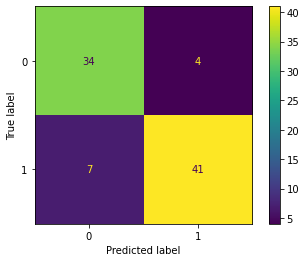

In [107]:
#Plot the confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(cls,X_test,y_test,values_format='d')